In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
from utils import *

# Pure Noise

The pure 4096s noise does not contain any injected signals in it.

In [2]:
# Load 4096s Noise File
noise_path = 'Data/Noise/noise_4096s.hdf'
noise = h5py.File(noise_path, 'r')
noise_L1 = noise['strain_L1'][:]
noise_H1 = noise['strain_H1'][:]
noise_V1 = noise['strain_V1'][:]

In [3]:
spin_detections = Inference(spin=True, strain_L1 = noise_L1, strain_H1 = noise_H1, strain_V1 = noise_V1)

Spin 3 Model Ensemble: 1/3


2023-10-07 23:30:48.446620: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13865 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0004:05:00.0, compute capability: 7.0
2023-10-07 23:31:06.176795: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8300


16/16 [==============================] - 12s 775ms/step
Spin 3 Model Ensemble: 2/3
16/16 [==============================] - 12s 775ms/step
Spin 3 Model Ensemble: 3/3
16/16 [==============================] - 12s 775ms/step
Ensemble Detection:  []


# Waveforms for spinning Binary Black Hole Mergers
In ___Spin_Waveforms.hdf___, it saves __10__ sets randomly generated spinning waveforms at __Hanford__, __Livingston__, and __Virgo__ with SNR __8.43__.

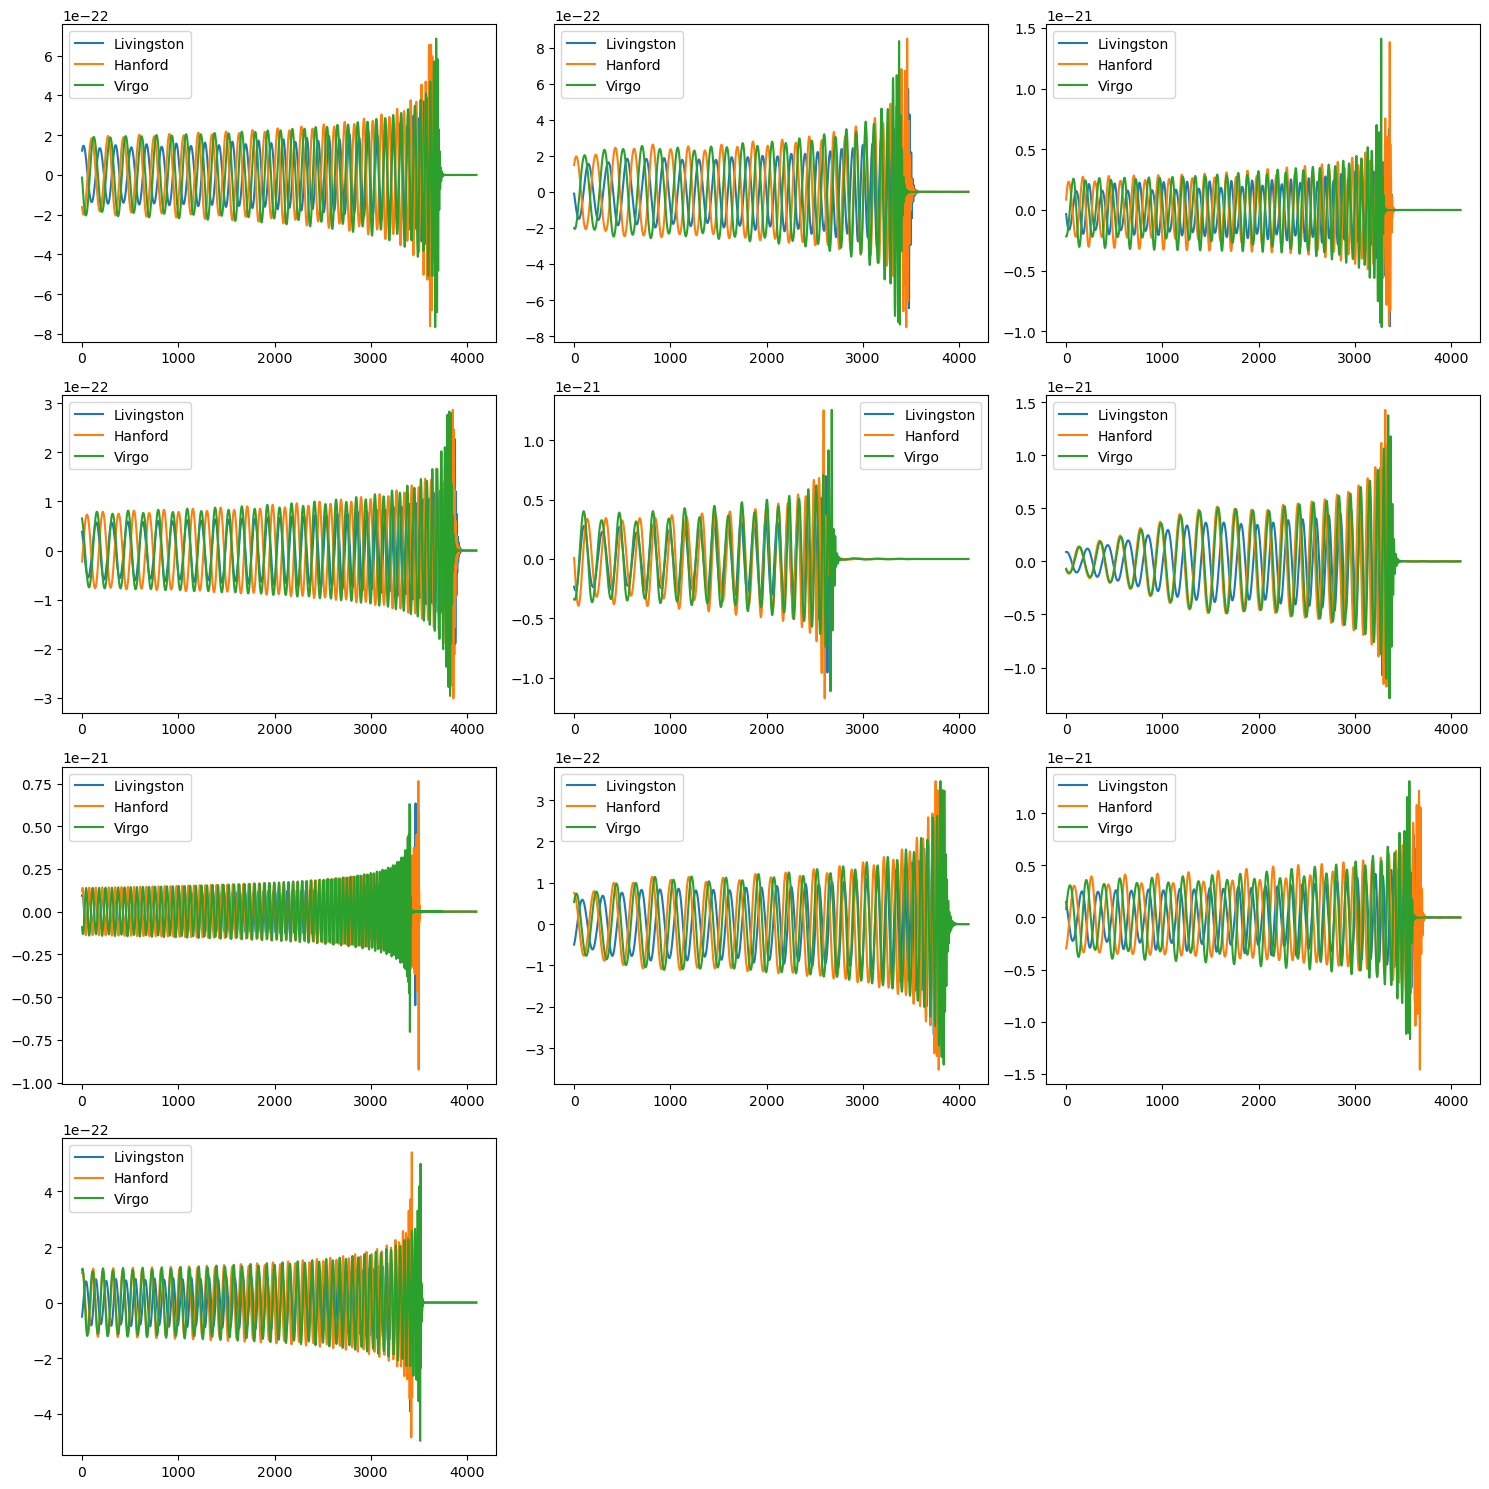

In [4]:
wf_file = 'Spin_Waveforms.hdf'
with h5py.File(wf_file, 'r') as f:
    H1_waves=f["H1_wave"][:]
    L1_waves=f["L1_wave"][:]
    V1_waves=f["V1_wave"][:]

fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Adjust size as needed
axs = axs.ravel()  # Flatten the array of axes

for i in range(H1_waves.shape[0]):
    axs[i].plot(L1_waves[i], label='Livingston')
    axs[i].plot(H1_waves[i], label='Hanford')
    axs[i].plot(V1_waves[i], label='Virgo')
    axs[i].legend()

# Remove extra subplots
for i in range(H1_waves.shape[0], 4*3):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

The 10 spin waveforms are randomly injected in the 4096s pure noise. The locations are randomly selected and saved in __start_index__. 

For __Inference__ function, it will take in the 4096s strain at 3 channels and inferenced by 3 spin/non-spin models.

For __Inference_Plot__ function, it will take the __union__ of ensemble detection and true positive locations. (i.e. it will contain the plots of not only __True Positives__ but also __False Positives__ and __False Negatives__ if any.)

See details of functions in ___utils.py___

Spin 3 Model Ensemble: 1/3
16/16 [==============================] - 12s 776ms/step
Spin 3 Model Ensemble: 2/3
16/16 [==============================] - 12s 775ms/step
Spin 3 Model Ensemble: 3/3
16/16 [==============================] - 12s 774ms/step
Ensemble Detection:  [ 100  435  630  745  895 2185 2550 2660 2900 3200]


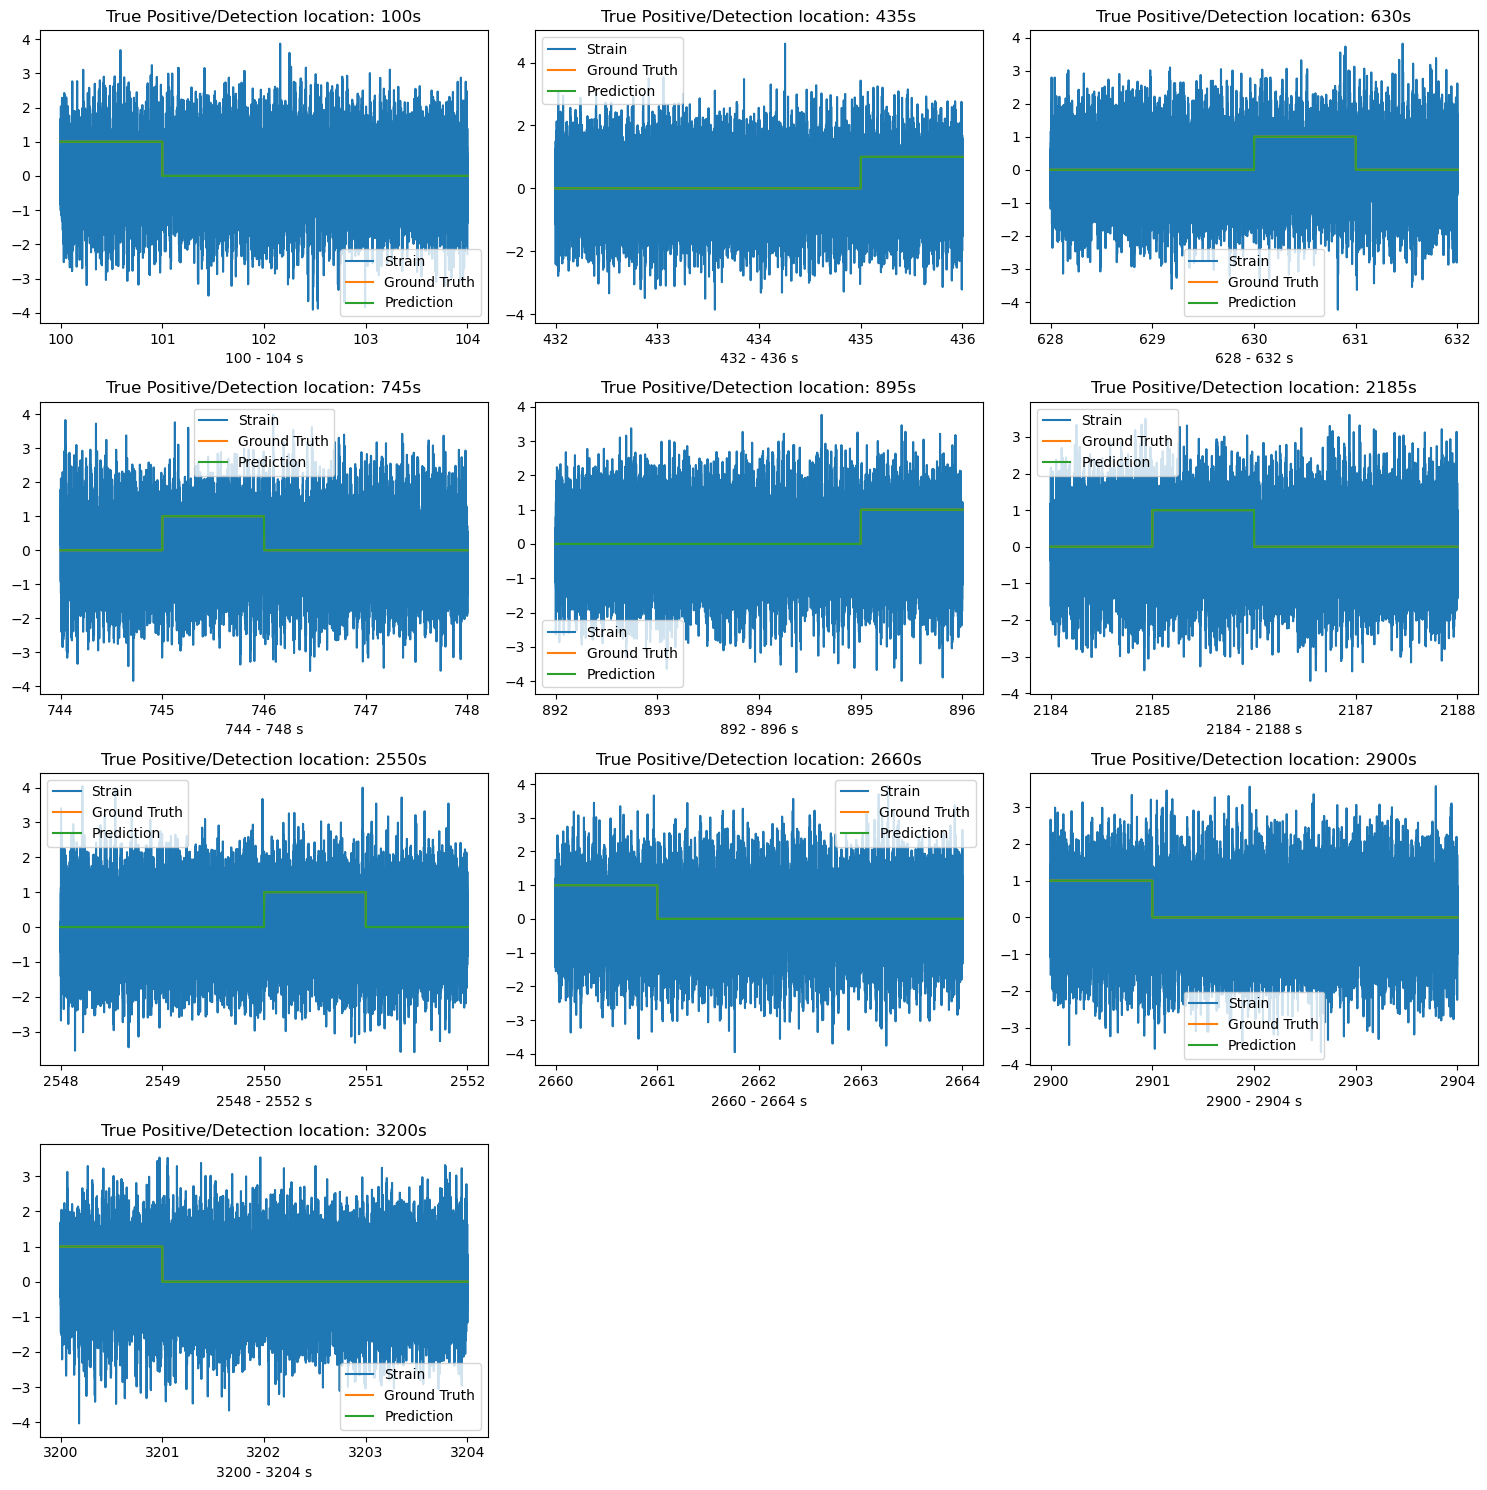

In [5]:
with h5py.File('Spin_Injected.hdf', 'r') as fp:
    injected_H1 = fp['strain_H1'][:]
    injected_L1 = fp['strain_L1'][:]
    injected_V1 = fp['strain_V1'][:]
    start_index = fp['start_index'][:]
detections, Pos = Inference(spin=True, strain_L1 = injected_L1, strain_H1 = injected_H1, strain_V1 = injected_V1)
Inference_Plot(injected_H1=injected_H1, start_index=start_index, Pos=Pos, detections=detections, ensemble=3)

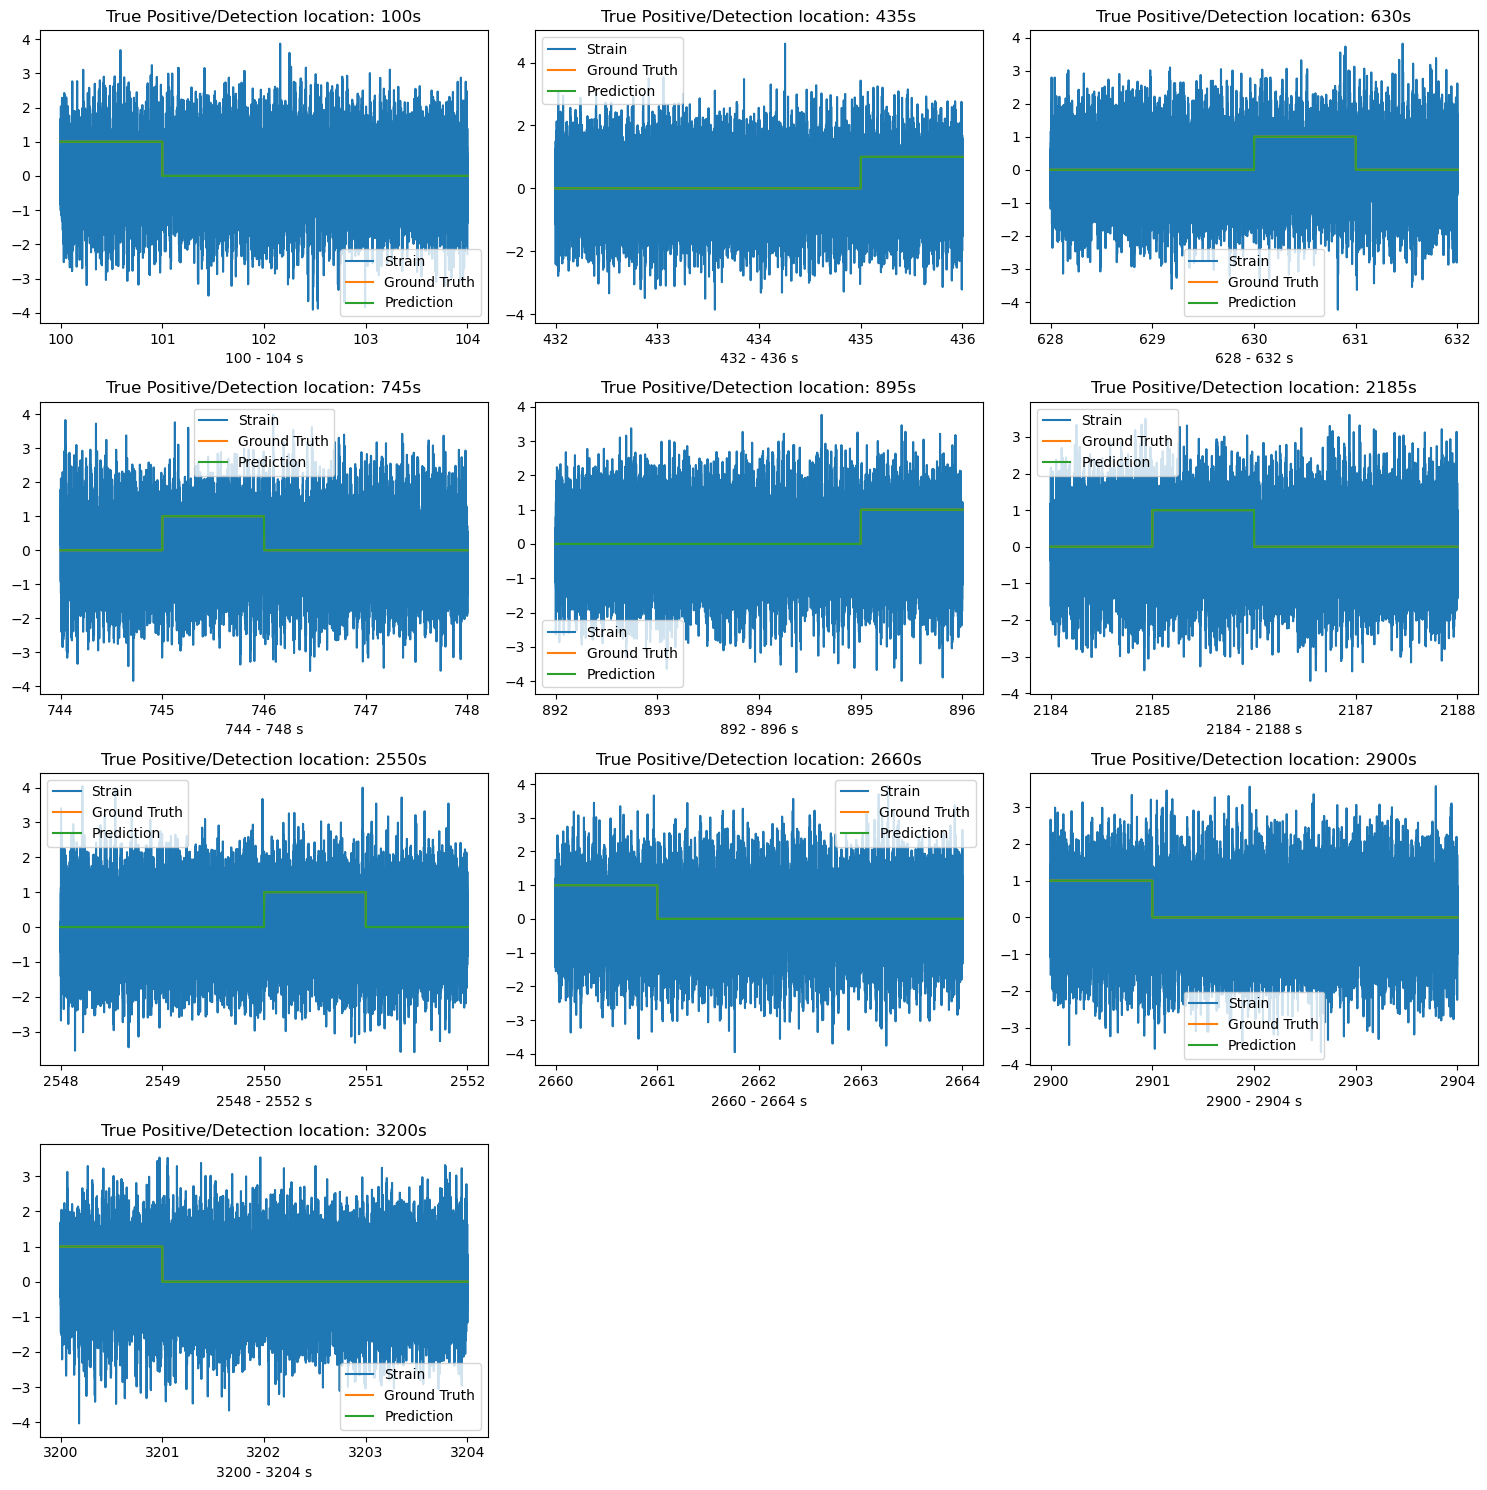

In [6]:
Inference_Plot(injected_H1=injected_H1, start_index=start_index, Pos=Pos, detections=detections, ensemble=2)

# Mass Prediction Filter
After the detection model ensemble, the filtered positive segments will then pass to the __mass prediction models__. If __average predicted total mass__ of the segment is smaller than __5 solar mass__ which is way more smaller than the training scheme, the segement will be marked as negative and filtered.

In [7]:
predictions = Mass_Inference(Strain_H1=injected_H1, Strain_L1=injected_L1, Strain_V1=injected_V1, index=Pos)

16/16 [==============================] - 19s 769ms/step
Mass Filtered Positives: [100, 435, 630, 745, 895, 2185, 2550, 2660, 2900, 3200]
